In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
import scipy.linalg as la
ur1='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(ur1,header=None)
#print(iris[0:][4])


In [32]:
#assigning labels

labels=np.unique(iris[0:][4])
for i in range(iris.shape[0]):
    if iris[0:][4][i]==labels[0]:
        iris[0:][4][i]=0
    if iris[0:][4][i]==labels[1]:
        iris[0:][4][i]=1
    if iris[0:][4][i]==labels[2]:
        iris[0:][4][i]=2
#print(labels)
colormap=np.array(['r','g','b'])
new_labels=np.array(iris[0:][4])
new_labels=pd.to_numeric(new_labels,downcast='integer')
#print(new_labels)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


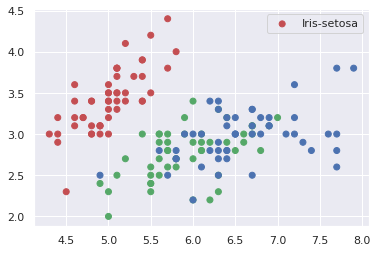

In [33]:
plt.figure(1)

plt.scatter(iris[0:][0],iris[0:][1],c=colormap[new_labels])
plt.legend(labels)

plt.show()

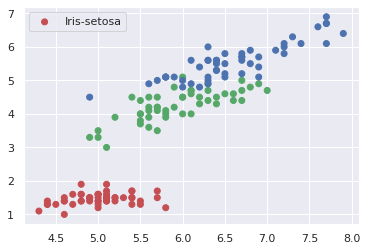

In [34]:
plt.figure(2)
plt.scatter(iris[0:][0],iris[0:][2],c=colormap[new_labels])
plt.legend(labels)

plt.show()

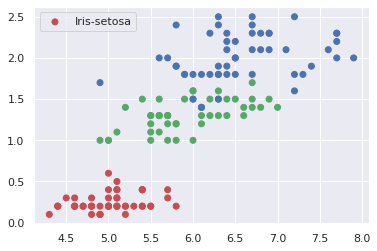

In [35]:
plt.figure(3)
plt.scatter(iris[0:][0],iris[0:][3],c=colormap[new_labels])
plt.legend(labels)

plt.show()

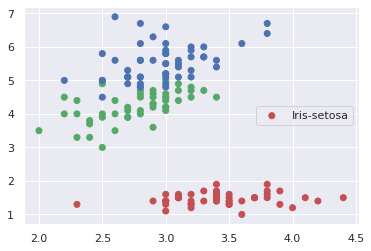

In [36]:
plt.figure(4)
plt.scatter(iris[0:][1],iris[0:][2],c=colormap[new_labels])
plt.legend(labels)

plt.show()

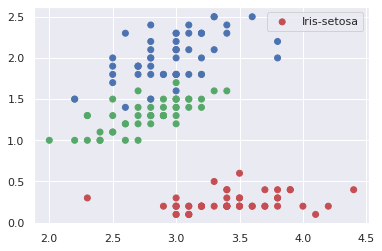

In [37]:
plt.figure(5)
plt.scatter(iris[0:][1],iris[0:][3],c=colormap[new_labels])
plt.legend(labels)

plt.show()

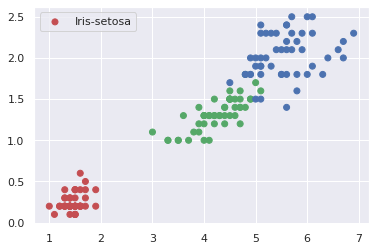

In [38]:
plt.figure(6)
plt.scatter(iris[0:][2],iris[0:][3],c=colormap[new_labels])
plt.legend(labels)

plt.show()

In [39]:
#data normalization
for i in range(1,5):
    for j in range(1,iris.shape[0]+1):
        iris[0:][i-1][j-1] = (iris[0:][i-1][j-1] - iris[0:][i-1].min()) / (iris[0:][i-1].max() - iris[0:][i-1].min())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
#deleting label from normalized data
iris_data=np.array(iris).transpose()
iris_data=iris_data[0:4]
iris_data=np.array(iris_data).transpose()

In [41]:
#finding mean vector
mean_vector=np.array([iris[0:][0].mean(),iris[0:][1].mean(),iris[0:][2].mean(),iris[0:][3].mean()])
# print(mean_vector)

In [42]:
#definning covarince
def covar(x1,x2,m1,m2):
    l=len(x1)
    sum=0
    for i in range(l):
        sum=sum+((x1[i]-m1)*(x2[i]-m2))
    return sum/float(l-1)

In [43]:
#finding covariance matrix
co_mat =np.zeros((4,4), dtype=np.float64)
for i in range(4):
    for j in range(4):
        co_mat[i][j]=covar(iris[0:][i],iris[0:][j],mean_vector[i],mean_vector[j])
#print(co_mat)

In [44]:
#finding eigen value and eigen vectors
eigen_val=la.eig(co_mat)[0]
eigen_vectors=la.eig(co_mat)[1]
# print(eigen_vectors)
#print(eigen_val)

In [45]:
#finding two largest valued eigen value and corresponding eigen vectors
lemda1=eigen_val[0]
lamda2=eigen_val[1]
v1=eigen_vectors[:,0]
v2=eigen_vectors[:,1]

In [46]:
#projection matrix
p_mat=np.array([v1,v2]).transpose()
# print(p_mat)

In [47]:
#new feature space
y=np.dot(iris_data,p_mat)
y1=np.array(y).transpose()

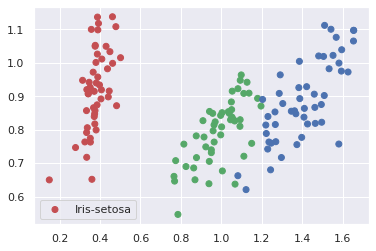

In [48]:
#final visualization
plt.figure(7)

plt.scatter(y1[0],y1[1],c=colormap[new_labels])
plt.legend(labels)

plt.show()